# Виконання

## Завдання друге

### Для початку імпортуємо модулі. Завантажимо датафрейм та виведемо його вміст.

In [53]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
df = pd.read_csv('data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


*Сутності*

### Перетворимо датафрейм у масив NumPy.

In [54]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
y = df['custcat'].values

*Перетворення датафрейму у масив NumPy*

### Нормалізуємо дані

In [55]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

*Нормалізація даних*

### Розділимо дані на тестові та навчальні.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

*Тестові та навчальні дані*

### Натренуємо модель.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

*Тренування моделі*

### Класифікуємо дані. 

In [58]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

*Класифікуємо дані*

### Перевіримо точність.

In [59]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


*Точність*

## Minkowski

### Бачимо, що точність замала. Спробуємо підіюрати інші значення k. Визначимо, які варіанти параметрів найкраще вирішують дану задачу для різних дистанцій.

### Зберігатимемо результати тестування моделей у списку results.

In [60]:
results = []

*Список результатів*

### Визначимо найкращі параметри для Minkowski.

In [61]:
from sklearn.model_selection import GridSearchCV
classificator = KNeighborsClassifier(metric='minkowski')
params = {'n_neighbors': range(1, 60)}
grid_search = GridSearchCV(classificator, params, cv=10, verbose=1)
grid_search.fit(X_train, y_train)
knn = grid_search.best_estimator_
knn

Fitting 10 folds for each of 59 candidates, totalling 590 fits


KNeighborsClassifier(n_neighbors=19)

*Визначення найкращого параметра*

### Натренуємо модель з найкращим параметром.

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

*Тренування моделі K-Nearest Neighbors*

### Визначимо точність моделі на тренувальних та тестових даних. Бачимо, що модель має схильність до оверфітингу.

In [63]:
y_pred = knn.predict(X_test)
train_score = round(knn.score(X_train, y_train), 5)
test_score = round(knn.score(X_test, y_test), 5)
results.append({'method': 'minkowsky', 'score': train_score, 'type': 'train'})
results.append({'method': 'minkowsky', 'score': test_score, 'type': 'test'})
print(f'Train accuracy: {train_score}')
print(f'Test accuracy: {test_score}')

Train accuracy: 0.45125
Test accuracy: 0.345


*Точність моделі K-Nearest Neighbors*

### Перевірка з нульовою точністю.

In [64]:
def calc_null_accuracy(y_train):
    y_pd = pd.DataFrame(y_train)
    dd = y_pd.value_counts().values
    return dd[0] / (sum(dd))
null_acc = calc_null_accuracy(y_train)
null_acc

0.28375

*Перевірка з нульовою точністю*

### Матриця невідповідностей

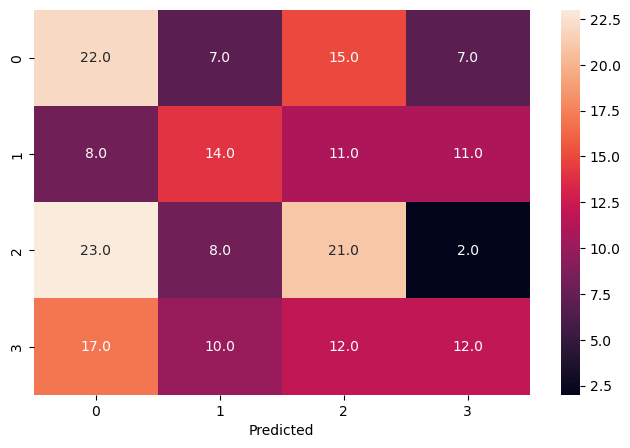

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def conf_mat(model, x_test, y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt=".1f")
    plt.xlabel('Predicted')
conf_mat(knn, X_test, y_test)

*Матриця невідповідностей*

### Визначимо метрики класифікації

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.31      0.43      0.36        51
           2       0.36      0.32      0.34        44
           3       0.36      0.39      0.37        54
           4       0.38      0.24      0.29        51

    accuracy                           0.34       200
   macro avg       0.35      0.34      0.34       200
weighted avg       0.35      0.34      0.34       200



*Метрики класифікації*

### І в кінці побудуємо матрицю кореляцій.

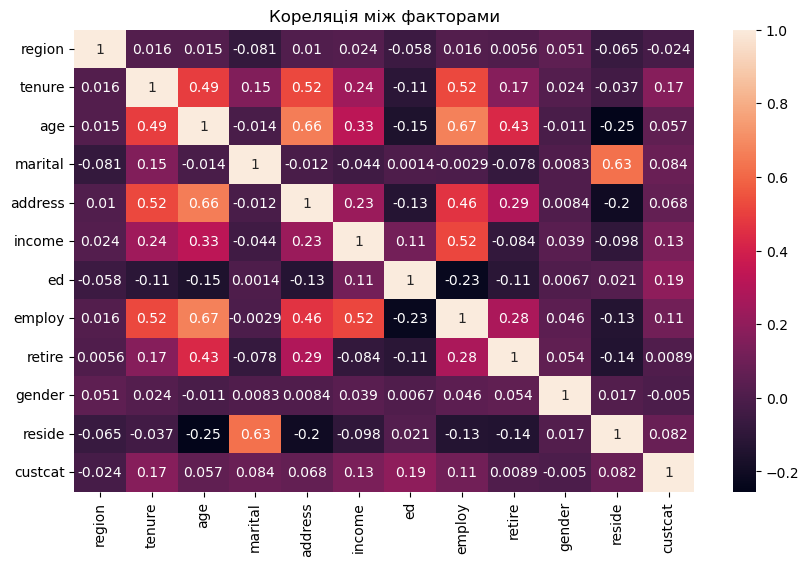

In [67]:
def corr_map(df, figsize):
    fig, axis = plt.subplots(figsize=figsize)
    axis.set_title('Кореляція між факторами')
    sns.heatmap(df.corr(), ax=axis, annot=True)
corr_map(df, (10, 6))

*Матриця кореляцій*

### Візуалізуємо спрогнозовані класи відносно tenure та ed.

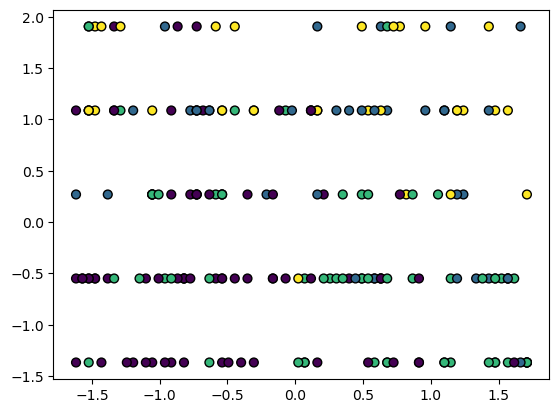

In [73]:
X_test_pd = pd.DataFrame(X_test, columns=df.columns[:-1])
plt.scatter(X_test_pd.tenure, X_test_pd.ed, marker="o", c=y_pred, s=40, edgecolor="k")
plt.show()

*Класи*

## Euclidian, Manhattan

### Визначимо найкращі параметри для Euclidian.

In [ ]:
from sklearn.model_selection import GridSearchCV
models = []
for d in ['euclidean', 'manhattan']:
    classificator = KNeighborsClassifier(metric='euclidean')
    params = {'n_neighbors': range(1, 60)}
    grid_search = GridSearchCV(classificator, params, cv=10, verbose=1)
    grid_search.fit(X_train, y_train)
    mod = grid_search.best_estimator_
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    train_score = round(mod.score(X_train, y_train), 5)
    test_score = round(mod.score(X_test, y_test), 5)
    results.append({'method': d, 'score': train_score, 'type': 'train'})
    results.append({'method': d, 'score': test_score, 'type': 'test'})
    print(f'Train accuracy {d}: {train_score}')
    print(f'Test accuracy {d}: {test_score}')
    models.append(mod)

Fitting 10 folds for each of 59 candidates, totalling 590 fits


Train accuracy euclidean: 0.45125
Test accuracy euclidean: 0.345
Fitting 10 folds for each of 59 candidates, totalling 590 fits
Train accuracy manhattan: 0.45125
Test accuracy manhattan: 0.345


*Матриця кореляцій*

### Візуалізуємо спрогнозовані класи відносно tenure та ed для Euclidian.

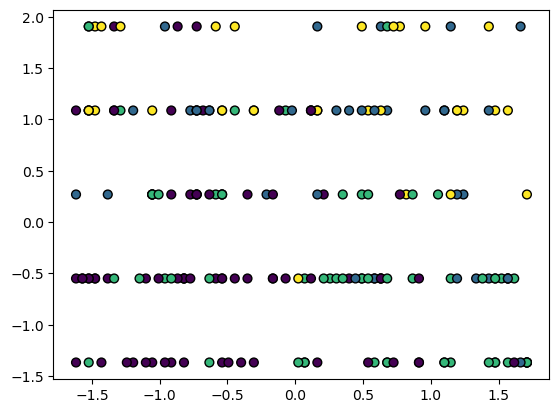

In [74]:
y_pred = models[0].predict(X_test)
X_test_pd = pd.DataFrame(X_test, columns=df.columns[:-1])
plt.scatter(X_test_pd.tenure, X_test_pd.ed, marker="o", c=y_pred, s=40, edgecolor="k")
plt.show()

*класи Euclidian*

### Візуалізуємо спрогнозовані класи відносно tenure та ed для Manhattan.

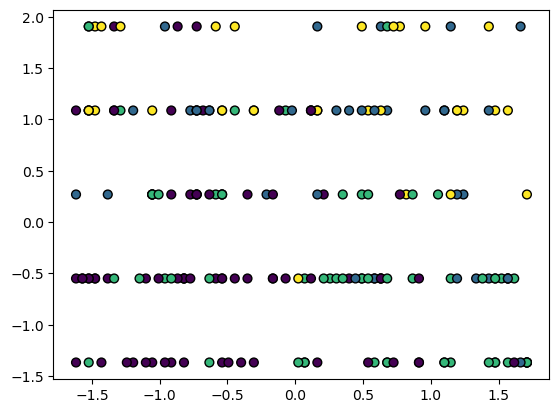

In [75]:
y_pred = models[1].predict(X_test)
X_test_pd = pd.DataFrame(X_test, columns=df.columns[:-1])
plt.scatter(X_test_pd.tenure, X_test_pd.ed, marker="o", c=y_pred, s=40, edgecolor="k")
plt.show()

*класи Manhattan*